## Logistic Regression
Regression analysis is a **predictive modeling** technique

Logistic regression produces results in a binary format,  which is used to predict the outcome of a categorical dependent variable. So the outcome should be discrete/categorical suchs as: Yes/No, True/False, 0 or 1..

Linear Regression:
 - the predicted values are continuous in nature
 - solves regression problems
 - straight line
 
Logistic Regression:
 - categorical variables
 - solves classification problems
 - S-Curve

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

titanic_data = pd.read_csv("datasets/titanic/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("# of passengers in originL data:"+str(len(titanic_data.index)))

# of passengers in originL data:891


### Analyzing Data

<Axes: xlabel='Survived', ylabel='count'>

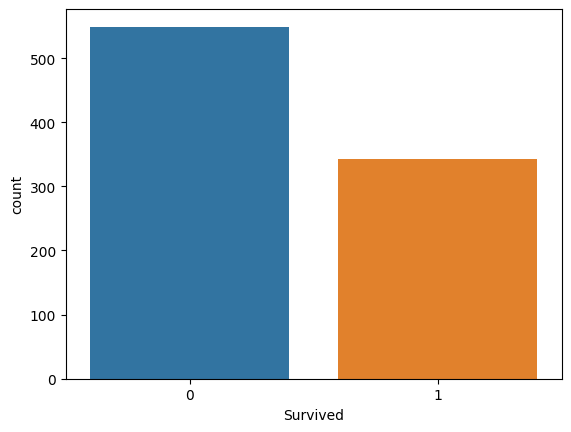

In [5]:
sns.countplot(x="Survived", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

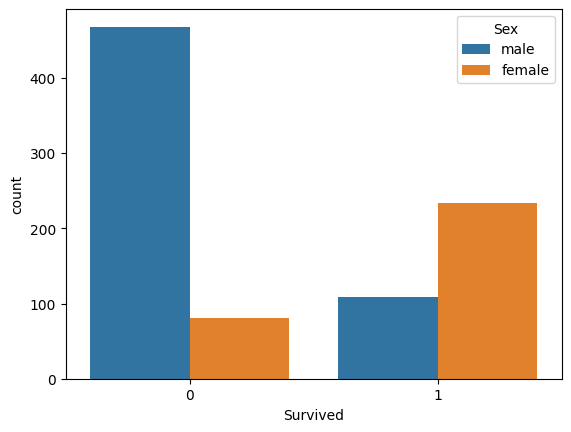

In [6]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

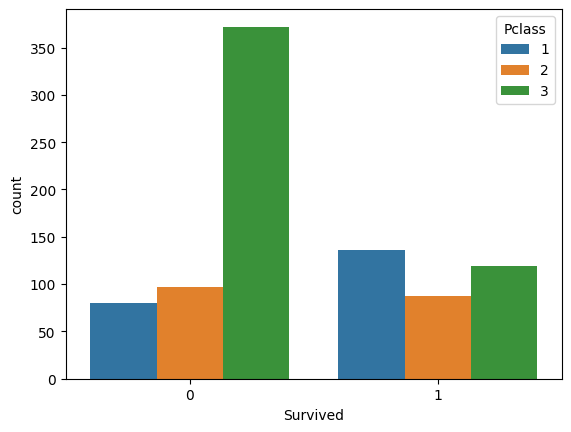

In [7]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<Axes: ylabel='Frequency'>

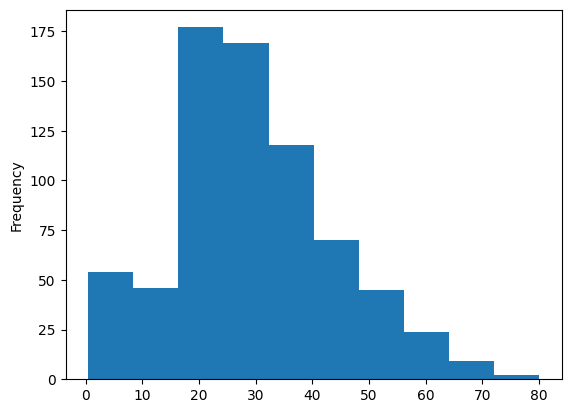

In [8]:
titanic_data["Age"].plot.hist()

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Wrangling

In [10]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

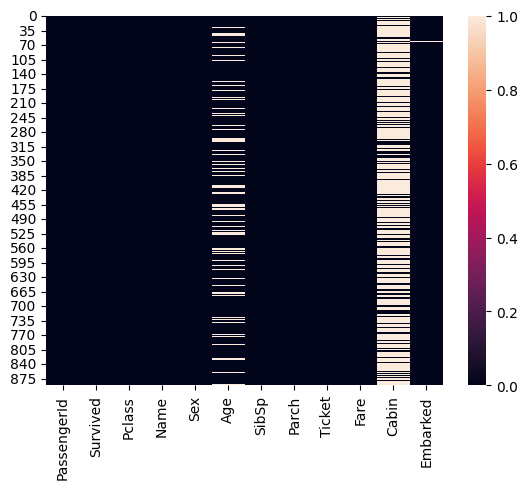

In [13]:
sns.heatmap(titanic_data.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

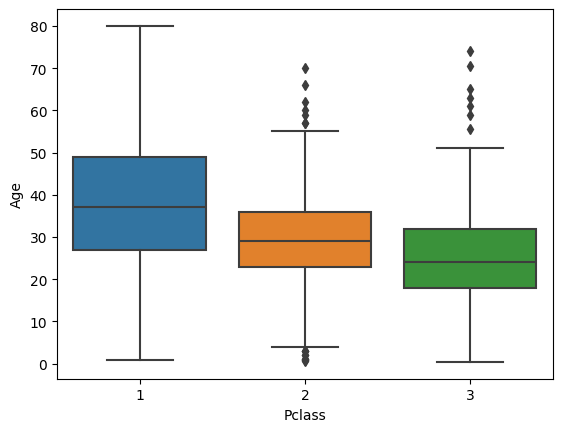

In [14]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
##to remove all null values
titanic_data.dropna(inplace=True)

In [22]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


#### we need to convert the categorical variables to numerical values for ML

In [30]:
pd.get_dummies(titanic_data['Sex'], dtype=int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


#### we don't need both columns in one hot encoding, we can remove the first one

In [33]:
sex = pd.get_dummies(titanic_data['Sex'], dtype=int, drop_first=True)

In [34]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [37]:
embark = pd.get_dummies(titanic_data['Embarked'], dtype=int, drop_first=True)

In [38]:
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
pcl = pd.get_dummies(titanic_data['Pclass'], dtype=int, drop_first=True)

In [40]:
titanic_data = pd.concat([titanic_data, sex, embark, pcl], axis=1)

In [41]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


#### so we drop not needed column for our model

In [48]:
titanic_data_copy = titanic_data.copy()

In [49]:
titanic_data_copy.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)

In [50]:
titanic_data_copy.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train & Test Data

In [106]:
y = titanic_data_copy['Survived']
X = titanic_data_copy.drop("Survived", axis=1)
X= X.rename(str,axis="columns") 

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [108]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [149]:
logmodel.fit(X_train, y_train)

/Users/yomi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
predict = logmodel.predict(X_test)
new_data = [22, 1, 0, 7, 1, 0, 1, 0, 1]

# Make sure to reshape the data to match the shape expected by the model
new_data_reshaped = np.array(new_data).reshape(1, -1)
prediction = logmodel.predict(new_data_reshaped)
print(prediction)

[0]


/Users/yomi/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Evaluate the model prediction

In [74]:
#using classification_report
from sklearn.metrics import classification_report

classification_report(y_test, predict)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

from the above we have a precision of 0.72 = 72%

In [81]:
#using the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predict)

array([[102,  24],
       [ 25,  63]])

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.7710280373831776

In [83]:
##manual calculation of precision
manual_accuracy = (102+63)/(102+24+25+62)
print(manual_accuracy)

0.7746478873239436


Thus accuracy = 0.77*100 = 77%

# SUV Data Analysis
We want to predict the factor that would make a person purchase SUV

In [85]:
suv_data = pd.read_csv("datasets/suv_data.csv")

In [86]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [88]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [144]:
X2=suv_data.iloc[:,[2,3]].values
y2=suv_data.iloc[:, 4].values

In [145]:
from sklearn.model_selection import train_test_split

X_train_suv, X_test_suv, y_train_suv, y_test_suv = train_test_split(X2, y2, test_size=0.25, random_state=0)

In [146]:
## we need to scale our input values for better performance
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_suv=sc.fit_transform(X_train_suv)
X_test_suv=sc.fit_transform(X_test_suv)

In [152]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_suv, y_train_suv)

LogisticRegression(random_state=0)

In [155]:
y_pred = classifier.predict(X_test_suv)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_suv, y_pred) * 100

87.0

In [162]:
##use model to check if user can purchase suv
# age: 31, salary: 30000

new_test_data = [10, 19000]

# Make sure to reshape the data to match the shape expected by the model
new_test_data_reshaped = np.array(new_test_data).reshape(1, -1)

purchase_prediction = classifier.predict(new_test_data_reshaped)

print(purchase_prediction)

1 above means can purchase SUV